In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [2]:
#using OHLC mean pricing to gauge worth of a stock
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [3]:
#Normalizing of data using first 4400 entries
scaler = MinMaxScaler()
OHLC_mean_scaled = OHLC_mean[:4400].reshape(-1,1)
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)
train_data = OHLC_mean_scaled


print(OHLC_mean_scaled)

[[0.01776186]
 [0.0184579 ]
 [0.01862648]
 ...
 [1.        ]
 [0.98862197]
 [0.98636298]]


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

predictions = []

#model is created here with RMSprop as the optimizer. Each step_size of x does a prediction x days into the future 

for step_size in range(1,121):
    X = OHLC_mean_scaled[:-step_size]
    Y = OHLC_mean_scaled[step_size:]

    trainX = X.reshape(-1, 1,1)

    trainY = Y


    #building and training the model
    model = Sequential()
    model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile( loss='mean_squared_error', optimizer='adagrad')
    model.fit(trainX, trainY, batch_size=32, epochs=100, verbose = 1)

    #makes a prediction depending on the value of step_size
    trainPredict = model.predict(trainX)
    last_val = trainPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    next_val = last_val*next_val
    
    predictions.append(next_val)
    
print (predictions)


Using TensorFlow backend.


Epoch 1/100
4399/4399 [==============================] - 5s 1ms/step - loss: 0.0819
Epoch 2/100
4399/4399 [==============================] - 1s 265us/step - loss: 0.0106
Epoch 3/100
4399/4399 [==============================] - 1s 274us/step - loss: 1.8863e-04
Epoch 4/100
4399/4399 [==============================] - 1s 250us/step - loss: 6.9701e-05
Epoch 5/100
4399/4399 [==============================] - 1s 257us/step - loss: 4.7554e-05
Epoch 6/100
4399/4399 [==============================] - 1s 273us/step - loss: 3.5835e-05
Epoch 7/100
4399/4399 [==============================] - 1s 250us/step - loss: 2.9627e-05
Epoch 8/100
4399/4399 [==============================] - 1s 265us/step - loss: 2.7374e-05
Epoch 9/100
4399/4399 [==============================] - 1s 273us/step - loss: 2.6430e-05
Epoch 10/100
4399/4399 [==============================] - 1s 249us/step - loss: 2.6095e-05
Epoch 11/100
4399/4399 [==============================] - 1s 253us/step - loss: 2.5988e-05
Epoch 12/100
4399/

4398/4398 [==============================] - 1s 268us/step - loss: 6.1927e-05
Epoch 82/100
4398/4398 [==============================] - 1s 270us/step - loss: 6.3431e-05
Epoch 83/100
4398/4398 [==============================] - 1s 261us/step - loss: 6.2272e-05
Epoch 84/100
4398/4398 [==============================] - 1s 264us/step - loss: 6.0723e-05
Epoch 85/100
4398/4398 [==============================] - 1s 266us/step - loss: 6.1647e-05
Epoch 86/100
4398/4398 [==============================] - 1s 277us/step - loss: 6.1497e-05
Epoch 87/100
4398/4398 [==============================] - 1s 269us/step - loss: 6.4274e-05
Epoch 88/100
4398/4398 [==============================] - 1s 268us/step - loss: 5.9891e-05
Epoch 89/100
4398/4398 [==============================] - 1s 287us/step - loss: 6.4508e-05
Epoch 90/100
4398/4398 [==============================] - 1s 286us/step - loss: 6.4360e-05
Epoch 91/100
4398/4398 [==============================] - 1s 267us/step - loss: 6.3356e-05
Epoch 92/100

4396/4396 [==============================] - 1s 311us/step - loss: 1.2957e-04
Epoch 62/100
4396/4396 [==============================] - 1s 309us/step - loss: 1.2496e-04
Epoch 63/100
4396/4396 [==============================] - 1s 310us/step - loss: 1.2971e-04
Epoch 64/100
4396/4396 [==============================] - 1s 322us/step - loss: 1.2784e-04
Epoch 65/100
4396/4396 [==============================] - 1s 309us/step - loss: 1.2513e-04
Epoch 66/100
4396/4396 [==============================] - 1s 324us/step - loss: 1.2530e-04
Epoch 67/100
4396/4396 [==============================] - 1s 311us/step - loss: 1.2733e-04
Epoch 68/100
4396/4396 [==============================] - 1s 313us/step - loss: 1.2486e-04
Epoch 69/100
4396/4396 [==============================] - 1s 340us/step - loss: 1.2627e-04
Epoch 70/100
4396/4396 [==============================] - 1s 307us/step - loss: 1.2670e-04
Epoch 71/100
4396/4396 [==============================] - 1s 312us/step - loss: 1.2529e-04
Epoch 72/100

Epoch 41/100
4394/4394 [==============================] - 1s 329us/step - loss: 1.9240e-04
Epoch 42/100
4394/4394 [==============================] - 1s 314us/step - loss: 1.8802e-04
Epoch 43/100
4394/4394 [==============================] - 1s 322us/step - loss: 2.0081e-04
Epoch 44/100
4394/4394 [==============================] - 2s 345us/step - loss: 1.8770e-04
Epoch 45/100
4394/4394 [==============================] - 1s 310us/step - loss: 1.8888e-04
Epoch 46/100
4394/4394 [==============================] - 1s 314us/step - loss: 1.9142e-04
Epoch 47/100
4394/4394 [==============================] - 1s 325us/step - loss: 1.9479e-04
Epoch 48/100
4394/4394 [==============================] - 1s 316us/step - loss: 1.9341e-04
Epoch 49/100
4394/4394 [==============================] - 1s 317us/step - loss: 1.8931e-04
Epoch 50/100
4394/4394 [==============================] - 1s 312us/step - loss: 1.8961e-04
Epoch 51/100
4394/4394 [==============================] - 1s 312us/step - loss: 1.9186e-04

4392/4392 [==============================] - 2s 387us/step - loss: 2.6347e-04
Epoch 22/100
4392/4392 [==============================] - 1s 315us/step - loss: 2.5897e-04
Epoch 23/100
4392/4392 [==============================] - 1s 313us/step - loss: 2.5863e-04
Epoch 24/100
4392/4392 [==============================] - 1s 329us/step - loss: 2.5581e-04
Epoch 25/100
4392/4392 [==============================] - 1s 327us/step - loss: 2.5665e-04
Epoch 26/100
4392/4392 [==============================] - 1s 314us/step - loss: 2.6108e-04
Epoch 27/100
4392/4392 [==============================] - 2s 342us/step - loss: 2.5694e-04
Epoch 28/100
4392/4392 [==============================] - 1s 324us/step - loss: 2.5739e-04
Epoch 29/100
4392/4392 [==============================] - 1s 323us/step - loss: 2.5979e-04
Epoch 30/100
4392/4392 [==============================] - 1s 322us/step - loss: 2.6331e-04
Epoch 31/100
4392/4392 [==============================] - 1s 315us/step - loss: 2.5924e-04
Epoch 32/100

4391/4391 [==============================] - 1s 318us/step - loss: 2.8514e-04
Epoch 12/100
4391/4391 [==============================] - 1s 320us/step - loss: 2.8492e-04
Epoch 13/100
4391/4391 [==============================] - 1s 317us/step - loss: 2.8805e-04
Epoch 14/100
4391/4391 [==============================] - 1s 329us/step - loss: 2.8422e-04
Epoch 15/100
4391/4391 [==============================] - 1s 320us/step - loss: 2.8468e-04
Epoch 16/100
4391/4391 [==============================] - 1s 323us/step - loss: 2.8816e-04
Epoch 17/100
4391/4391 [==============================] - 2s 347us/step - loss: 2.8090e-04
Epoch 18/100
4391/4391 [==============================] - 1s 320us/step - loss: 2.9164e-04
Epoch 19/100
4391/4391 [==============================] - 1s 331us/step - loss: 2.8539e-04
Epoch 20/100
4391/4391 [==============================] - 1s 320us/step - loss: 2.8881e-04
Epoch 21/100
4391/4391 [==============================] - 2s 355us/step - loss: 2.8456e-04
Epoch 22/100

4390/4390 [==============================] - 1s 318us/step - loss: 3.2082e-04
Epoch 92/100
4390/4390 [==============================] - 1s 314us/step - loss: 3.1798e-04
Epoch 93/100
4390/4390 [==============================] - 1s 340us/step - loss: 3.1973e-04
Epoch 94/100
4390/4390 [==============================] - 1s 336us/step - loss: 3.1496e-04
Epoch 95/100
4390/4390 [==============================] - 1s 327us/step - loss: 3.1641e-04
Epoch 96/100
4390/4390 [==============================] - 2s 345us/step - loss: 3.3192e-04
Epoch 97/100
4390/4390 [==============================] - 1s 321us/step - loss: 3.2529e-04
Epoch 98/100
4390/4390 [==============================] - 1s 329us/step - loss: 3.3039e-04
Epoch 99/100
4390/4390 [==============================] - 1s 315us/step - loss: 3.2040e-04
Epoch 100/100
4390/4390 [==============================] - 1s 320us/step - loss: 3.2733e-04
Epoch 1/100
4389/4389 [==============================] - 6s 1ms/step - loss: 0.0699
Epoch 2/100
4389/4

4389/4389 [==============================] - 2s 352us/step - loss: 3.5471e-04
Epoch 82/100
4389/4389 [==============================] - 2s 344us/step - loss: 3.4637e-04
Epoch 83/100
4389/4389 [==============================] - 2s 345us/step - loss: 3.5335e-04
Epoch 84/100
4389/4389 [==============================] - 1s 342us/step - loss: 3.6832e-04
Epoch 85/100
4389/4389 [==============================] - 2s 343us/step - loss: 3.6096e-04
Epoch 86/100
4389/4389 [==============================] - 2s 345us/step - loss: 3.5252e-04
Epoch 87/100
4389/4389 [==============================] - 2s 342us/step - loss: 3.4831e-04
Epoch 88/100
4389/4389 [==============================] - 1s 338us/step - loss: 3.5957e-04
Epoch 89/100
4389/4389 [==============================] - 1s 341us/step - loss: 3.6007e-04
Epoch 90/100
4389/4389 [==============================] - 2s 343us/step - loss: 3.6215e-04
Epoch 91/100
4389/4389 [==============================] - 2s 346us/step - loss: 3.6971e-04
Epoch 92/100

4387/4387 [==============================] - 1s 324us/step - loss: 4.1178e-04
Epoch 62/100
4387/4387 [==============================] - 1s 321us/step - loss: 4.1700e-04
Epoch 63/100
4387/4387 [==============================] - 1s 322us/step - loss: 4.1987e-04
Epoch 64/100
4387/4387 [==============================] - 2s 475us/step - loss: 4.1812e-04
Epoch 65/100
4387/4387 [==============================] - 2s 487us/step - loss: 4.1797e-04
Epoch 66/100
4387/4387 [==============================] - 1s 341us/step - loss: 4.1521e-04
Epoch 67/100
4387/4387 [==============================] - 1s 337us/step - loss: 4.2318e-04
Epoch 68/100
4387/4387 [==============================] - 2s 467us/step - loss: 4.2180e-04
Epoch 69/100
4387/4387 [==============================] - 2s 453us/step - loss: 4.1098e-04
Epoch 70/100
4387/4387 [==============================] - 2s 453us/step - loss: 4.1526e-04
Epoch 71/100
4387/4387 [==============================] - 2s 449us/step - loss: 4.2479e-04
Epoch 72/100

4385/4385 [==============================] - 1s 332us/step - loss: 4.7697e-04
Epoch 42/100
4385/4385 [==============================] - 1s 333us/step - loss: 4.7789e-04
Epoch 43/100
4385/4385 [==============================] - 1s 339us/step - loss: 4.7944e-04
Epoch 44/100
4385/4385 [==============================] - 1s 332us/step - loss: 4.7594e-04
Epoch 45/100
4385/4385 [==============================] - 2s 344us/step - loss: 4.8287e-04
Epoch 46/100
4385/4385 [==============================] - 2s 348us/step - loss: 4.8158e-04
Epoch 47/100
4385/4385 [==============================] - 1s 331us/step - loss: 4.8661e-04
Epoch 48/100
4385/4385 [==============================] - 2s 522us/step - loss: 4.7827e-04
Epoch 49/100
4385/4385 [==============================] - 3s 662us/step - loss: 4.7299e-04
Epoch 50/100
4385/4385 [==============================] - 3s 615us/step - loss: 4.7815e-04
Epoch 51/100
4385/4385 [==============================] - 2s 516us/step - loss: 4.9570e-04
Epoch 52/100

4383/4383 [==============================] - 3s 753us/step - loss: 5.3392e-04
Epoch 22/100
4383/4383 [==============================] - 3s 620us/step - loss: 5.3893e-04
Epoch 23/100
4383/4383 [==============================] - 2s 478us/step - loss: 5.3902e-04
Epoch 24/100
4383/4383 [==============================] - 2s 385us/step - loss: 5.4646e-04
Epoch 25/100
4383/4383 [==============================] - 2s 392us/step - loss: 5.4163e-04
Epoch 26/100
4383/4383 [==============================] - 2s 378us/step - loss: 5.4139e-04
Epoch 27/100
4383/4383 [==============================] - 2s 389us/step - loss: 5.4878e-04
Epoch 28/100
4383/4383 [==============================] - 2s 395us/step - loss: 5.3830e-04
Epoch 29/100
4383/4383 [==============================] - 2s 393us/step - loss: 5.4250e-04
Epoch 30/100
4383/4383 [==============================] - 2s 399us/step - loss: 5.3937e-04
Epoch 31/100
4383/4383 [==============================] - 2s 462us/step - loss: 5.4301e-04
Epoch 32/100

4381/4381 [==============================] - 9s 2ms/step - loss: 0.0847
Epoch 2/100
4381/4381 [==============================] - 2s 432us/step - loss: 0.0125
Epoch 3/100
4381/4381 [==============================] - 2s 545us/step - loss: 8.0653e-04
Epoch 4/100
4381/4381 [==============================] - 2s 531us/step - loss: 6.4241e-04
Epoch 5/100
4381/4381 [==============================] - 2s 518us/step - loss: 6.1144e-04
Epoch 6/100
4381/4381 [==============================] - 3s 625us/step - loss: 6.0732e-04
Epoch 7/100
4381/4381 [==============================] - 3s 724us/step - loss: 6.1079e-04
Epoch 8/100
4381/4381 [==============================] - 2s 529us/step - loss: 6.0176e-04
Epoch 9/100
4381/4381 [==============================] - 3s 662us/step - loss: 6.0339e-04
Epoch 10/100
4381/4381 [==============================] - 2s 426us/step - loss: 5.9916e-04
Epoch 11/100
4381/4381 [==============================] - 2s 427us/step - loss: 6.0332e-04
Epoch 12/100
4381/4381 [======

4380/4380 [==============================] - 1s 341us/step - loss: 6.4264e-04
Epoch 82/100
4380/4380 [==============================] - 1s 342us/step - loss: 6.3783e-04
Epoch 83/100
4380/4380 [==============================] - 2s 368us/step - loss: 6.4072e-04
Epoch 84/100
4380/4380 [==============================] - 1s 339us/step - loss: 6.3189e-04
Epoch 85/100
4380/4380 [==============================] - 2s 343us/step - loss: 6.3980e-04
Epoch 86/100
4380/4380 [==============================] - 2s 350us/step - loss: 6.3040e-04
Epoch 87/100
4380/4380 [==============================] - 1s 340us/step - loss: 6.3080e-04
Epoch 88/100
4380/4380 [==============================] - 2s 395us/step - loss: 6.5496e-04
Epoch 89/100
4380/4380 [==============================] - 3s 683us/step - loss: 6.4571e-04
Epoch 90/100
4380/4380 [==============================] - 2s 351us/step - loss: 6.3124e-04
Epoch 91/100
4380/4380 [==============================] - 2s 422us/step - loss: 6.3335e-04
Epoch 92/100

4378/4378 [==============================] - 2s 409us/step - loss: 7.1644e-04
Epoch 62/100
4378/4378 [==============================] - 2s 396us/step - loss: 7.0846e-04
Epoch 63/100
4378/4378 [==============================] - 2s 398us/step - loss: 7.0651e-04
Epoch 64/100
4378/4378 [==============================] - 2s 367us/step - loss: 7.0525e-04
Epoch 65/100
4378/4378 [==============================] - ETA: 0s - loss: 7.0809e-0 - 2s 369us/step - loss: 7.0261e-04
Epoch 66/100
4378/4378 [==============================] - 2s 532us/step - loss: 7.0193e-04
Epoch 67/100
4378/4378 [==============================] - 3s 766us/step - loss: 7.1240e-04
Epoch 68/100
4378/4378 [==============================] - 2s 385us/step - loss: 7.0631e-04
Epoch 69/100
4378/4378 [==============================] - 2s 435us/step - loss: 7.0402e-04
Epoch 70/100
4378/4378 [==============================] - 2s 374us/step - loss: 7.0741e-04
Epoch 71/100
4378/4378 [==============================] - 2s 381us/step - l

Epoch 40/100
4376/4376 [==============================] - 1s 282us/step - loss: 7.7083e-04
Epoch 41/100
4376/4376 [==============================] - 1s 286us/step - loss: 7.5903e-04
Epoch 42/100
4376/4376 [==============================] - 1s 295us/step - loss: 7.5885e-04
Epoch 43/100
4376/4376 [==============================] - 1s 293us/step - loss: 7.5977e-04
Epoch 44/100
4376/4376 [==============================] - 1s 284us/step - loss: 7.5680e-04
Epoch 45/100
4376/4376 [==============================] - 1s 289us/step - loss: 7.7459e-04
Epoch 46/100
4376/4376 [==============================] - 1s 313us/step - loss: 7.6598e-04 0s - loss: 
Epoch 47/100
4376/4376 [==============================] - 1s 283us/step - loss: 7.5497e-04
Epoch 48/100
4376/4376 [==============================] - 1s 284us/step - loss: 7.6344e-04
Epoch 49/100
4376/4376 [==============================] - 1s 302us/step - loss: 7.5697e-04
Epoch 50/100
4376/4376 [==============================] - 1s 287us/step - loss

4375/4375 [==============================] - 1s 293us/step - loss: 7.9212e-04
Epoch 31/100
4375/4375 [==============================] - 1s 285us/step - loss: 8.1874e-04
Epoch 32/100
4375/4375 [==============================] - 1s 294us/step - loss: 7.9009e-04
Epoch 33/100
4375/4375 [==============================] - 1s 293us/step - loss: 7.8577e-04
Epoch 34/100
4375/4375 [==============================] - 1s 293us/step - loss: 7.8922e-04
Epoch 35/100
4375/4375 [==============================] - 1s 296us/step - loss: 7.8593e-04
Epoch 36/100
4375/4375 [==============================] - 1s 297us/step - loss: 7.9032e-04
Epoch 37/100
4375/4375 [==============================] - 1s 288us/step - loss: 7.9036e-04
Epoch 38/100
4375/4375 [==============================] - 1s 295us/step - loss: 7.8561e-04
Epoch 39/100
4375/4375 [==============================] - 1s 316us/step - loss: 7.8156e-04
Epoch 40/100
4375/4375 [==============================] - 1s 293us/step - loss: 7.9356e-04
Epoch 41/100

4373/4373 [==============================] - 1s 310us/step - loss: 8.3885e-04
Epoch 11/100
4373/4373 [==============================] - 1s 293us/step - loss: 8.4097e-04
Epoch 12/100
4373/4373 [==============================] - 1s 299us/step - loss: 8.4835e-04
Epoch 13/100
4373/4373 [==============================] - 1s 297us/step - loss: 8.4641e-04
Epoch 14/100
4373/4373 [==============================] - 1s 292us/step - loss: 8.5473e-04
Epoch 15/100
4373/4373 [==============================] - 1s 293us/step - loss: 8.4452e-04
Epoch 16/100
4373/4373 [==============================] - 1s 291us/step - loss: 8.4031e-04
Epoch 17/100
4373/4373 [==============================] - 1s 295us/step - loss: 8.3698e-04
Epoch 18/100
4373/4373 [==============================] - 1s 290us/step - loss: 8.5768e-04
Epoch 19/100
4373/4373 [==============================] - 1s 310us/step - loss: 8.3980e-04
Epoch 20/100
4373/4373 [==============================] - 1s 290us/step - loss: 8.5433e-04
Epoch 21/100

4373/4373 [==============================] - 1s 291us/step - loss: 8.5669e-04
Epoch 1/100
4372/4372 [==============================] - 7s 2ms/step - loss: 0.0717
Epoch 2/100
4372/4372 [==============================] - 1s 291us/step - loss: 0.0089
Epoch 3/100
4372/4372 [==============================] - 1s 305us/step - loss: 0.0012
Epoch 4/100
4372/4372 [==============================] - 1s 292us/step - loss: 9.5325e-04
Epoch 5/100
4372/4372 [==============================] - 1s 292us/step - loss: 8.9282e-04
Epoch 6/100
4372/4372 [==============================] - 1s 293us/step - loss: 8.8728e-04
Epoch 7/100
4372/4372 [==============================] - 1s 292us/step - loss: 8.8503e-04
Epoch 8/100
4372/4372 [==============================] - 1s 290us/step - loss: 8.8249e-04
Epoch 9/100
4372/4372 [==============================] - 1s 298us/step - loss: 8.7936e-04
Epoch 10/100
4372/4372 [==============================] - 1s 301us/step - loss: 8.8346e-04
Epoch 11/100
4372/4372 [===========

4371/4371 [==============================] - 1s 312us/step - loss: 9.2983e-04
Epoch 80/100
4371/4371 [==============================] - 1s 310us/step - loss: 9.2260e-04
Epoch 81/100
4371/4371 [==============================] - 1s 339us/step - loss: 9.1642e-04
Epoch 82/100
4371/4371 [==============================] - 2s 380us/step - loss: 9.1341e-04
Epoch 83/100
4371/4371 [==============================] - 1s 317us/step - loss: 9.2591e-04
Epoch 84/100
4371/4371 [==============================] - 1s 300us/step - loss: 9.2042e-04
Epoch 85/100
4371/4371 [==============================] - 1s 302us/step - loss: 9.0750e-04
Epoch 86/100
4371/4371 [==============================] - 2s 355us/step - loss: 9.0503e-04
Epoch 87/100
4371/4371 [==============================] - 1s 308us/step - loss: 9.0908e-04
Epoch 88/100
4371/4371 [==============================] - 1s 299us/step - loss: 9.0199e-04
Epoch 89/100
4371/4371 [==============================] - 1s 320us/step - loss: 9.0556e-04
Epoch 90/100

4369/4369 [==============================] - 1s 305us/step - loss: 9.6275e-04
Epoch 60/100
4369/4369 [==============================] - 1s 305us/step - loss: 9.7756e-04
Epoch 61/100
4369/4369 [==============================] - 1s 308us/step - loss: 9.6589e-04
Epoch 62/100
4369/4369 [==============================] - 1s 313us/step - loss: 9.7386e-04
Epoch 63/100
4369/4369 [==============================] - 1s 305us/step - loss: 0.0010
Epoch 64/100
4369/4369 [==============================] - 1s 314us/step - loss: 9.7129e-04
Epoch 65/100
4369/4369 [==============================] - 1s 322us/step - loss: 9.7275e-04
Epoch 66/100
4369/4369 [==============================] - 1s 304us/step - loss: 9.7614e-04
Epoch 67/100
4369/4369 [==============================] - 1s 314us/step - loss: 9.6291e-04
Epoch 68/100
4369/4369 [==============================] - 1s 308us/step - loss: 9.6474e-04
Epoch 69/100
4369/4369 [==============================] - 1s 300us/step - loss: 9.6170e-04
Epoch 70/100
436

Epoch 51/100
4368/4368 [==============================] - 1s 328us/step - loss: 0.0010
Epoch 52/100
4368/4368 [==============================] - 1s 303us/step - loss: 0.0010
Epoch 53/100
4368/4368 [==============================] - 1s 308us/step - loss: 9.9393e-04
Epoch 54/100
4368/4368 [==============================] - 1s 316us/step - loss: 0.0010
Epoch 55/100
4368/4368 [==============================] - 1s 308us/step - loss: 0.0010
Epoch 56/100
4368/4368 [==============================] - 1s 304us/step - loss: 9.9815e-04
Epoch 57/100
4368/4368 [==============================] - 1s 310us/step - loss: 0.0010
Epoch 58/100
4368/4368 [==============================] - 1s 305us/step - loss: 0.0010
Epoch 59/100
4368/4368 [==============================] - 1s 310us/step - loss: 0.0010
Epoch 60/100
4368/4368 [==============================] - 1s 312us/step - loss: 9.9984e-04
Epoch 61/100
4368/4368 [==============================] - 1s 306us/step - loss: 9.9051e-04
Epoch 62/100
4368/4368 [===

Epoch 44/100
4367/4367 [==============================] - 1s 310us/step - loss: 0.0010
Epoch 45/100
4367/4367 [==============================] - 1s 322us/step - loss: 0.0010
Epoch 46/100
4367/4367 [==============================] - 1s 308us/step - loss: 0.0010
Epoch 47/100
4367/4367 [==============================] - 1s 308us/step - loss: 0.0010
Epoch 48/100
4367/4367 [==============================] - 1s 338us/step - loss: 0.0010
Epoch 49/100
4367/4367 [==============================] - 1s 307us/step - loss: 0.0010
Epoch 50/100
4367/4367 [==============================] - 1s 309us/step - loss: 0.0010
Epoch 51/100
4367/4367 [==============================] - 1s 324us/step - loss: 0.0010
Epoch 52/100
4367/4367 [==============================] - 1s 307us/step - loss: 0.0010
Epoch 53/100
4367/4367 [==============================] - 1s 309us/step - loss: 0.0010
Epoch 54/100
4367/4367 [==============================] - 1s 307us/step - loss: 0.0010
Epoch 55/100
4367/4367 [===================

4365/4365 [==============================] - 1s 312us/step - loss: 0.0011
Epoch 32/100
4365/4365 [==============================] - 1s 312us/step - loss: 0.0011
Epoch 33/100
4365/4365 [==============================] - 1s 310us/step - loss: 0.0011
Epoch 34/100
4365/4365 [==============================] - 1s 327us/step - loss: 0.0011
Epoch 35/100
4365/4365 [==============================] - 1s 310us/step - loss: 0.0011
Epoch 36/100
4365/4365 [==============================] - 1s 310us/step - loss: 0.0011
Epoch 37/100
4365/4365 [==============================] - 1s 339us/step - loss: 0.0011
Epoch 38/100
4365/4365 [==============================] - 1s 319us/step - loss: 0.0011
Epoch 39/100
4365/4365 [==============================] - 1s 310us/step - loss: 0.0011
Epoch 40/100
4365/4365 [==============================] - 1s 328us/step - loss: 0.0011
Epoch 41/100
4365/4365 [==============================] - 1s 311us/step - loss: 0.0011
Epoch 42/100
4365/4365 [==============================] 

4363/4363 [==============================] - 1s 274us/step - loss: 0.0011
Epoch 20/100
4363/4363 [==============================] - 1s 289us/step - loss: 0.0011
Epoch 21/100
4363/4363 [==============================] - 1s 267us/step - loss: 0.0012
Epoch 22/100
4363/4363 [==============================] - 1s 271us/step - loss: 0.0011
Epoch 23/100
4363/4363 [==============================] - 1s 273us/step - loss: 0.0011
Epoch 24/100
4363/4363 [==============================] - 1s 274us/step - loss: 0.0011
Epoch 25/100
4363/4363 [==============================] - 1s 275us/step - loss: 0.0011
Epoch 26/100
4363/4363 [==============================] - 1s 272us/step - loss: 0.0011
Epoch 27/100
4363/4363 [==============================] - 1s 294us/step - loss: 0.0012
Epoch 28/100
4363/4363 [==============================] - 1s 277us/step - loss: 0.0012
Epoch 29/100
4363/4363 [==============================] - 1s 274us/step - loss: 0.0011
Epoch 30/100
4363/4363 [==============================] 

4361/4361 [==============================] - 1s 299us/step - loss: 0.0012
Epoch 8/100
4361/4361 [==============================] - 1s 311us/step - loss: 0.0012
Epoch 9/100
4361/4361 [==============================] - 1s 291us/step - loss: 0.0012
Epoch 10/100
4361/4361 [==============================] - 1s 299us/step - loss: 0.0012
Epoch 11/100
4361/4361 [==============================] - 1s 308us/step - loss: 0.0012
Epoch 12/100
4361/4361 [==============================] - 1s 293us/step - loss: 0.0012E
Epoch 13/100
4361/4361 [==============================] - 1s 289us/step - loss: 0.0012
Epoch 14/100
4361/4361 [==============================] - 1s 312us/step - loss: 0.0012
Epoch 15/100
4361/4361 [==============================] - 1s 291us/step - loss: 0.0012
Epoch 16/100
4361/4361 [==============================] - 1s 290us/step - loss: 0.0012
Epoch 17/100
4361/4361 [==============================] - 1s 285us/step - loss: 0.0012
Epoch 18/100
4361/4361 [==============================] -

4360/4360 [==============================] - 1s 275us/step - loss: 0.0012
Epoch 96/100
4360/4360 [==============================] - 1s 276us/step - loss: 0.0012
Epoch 97/100
4360/4360 [==============================] - 1s 303us/step - loss: 0.0012
Epoch 98/100
4360/4360 [==============================] - 1s 282us/step - loss: 0.0012
Epoch 99/100
4360/4360 [==============================] - 1s 283us/step - loss: 0.0012
Epoch 100/100
4360/4360 [==============================] - 1s 305us/step - loss: 0.0012
Epoch 1/100
4359/4359 [==============================] - 8s 2ms/step - loss: 0.0732
Epoch 2/100
4359/4359 [==============================] - 1s 284us/step - loss: 0.0102
Epoch 3/100
4359/4359 [==============================] - 1s 306us/step - loss: 0.0015
Epoch 4/100
4359/4359 [==============================] - 1s 280us/step - loss: 0.0013
Epoch 5/100
4359/4359 [==============================] - 1s 279us/step - loss: 0.0012
Epoch 6/100
4359/4359 [==============================] - 1s 29

4358/4358 [==============================] - 1s 322us/step - loss: 0.0013
Epoch 84/100
4358/4358 [==============================] - 1s 320us/step - loss: 0.0013
Epoch 85/100
4358/4358 [==============================] - 1s 310us/step - loss: 0.0013
Epoch 86/100
4358/4358 [==============================] - 1s 330us/step - loss: 0.0013
Epoch 87/100
4358/4358 [==============================] - 1s 314us/step - loss: 0.0013
Epoch 88/100
4358/4358 [==============================] - 1s 310us/step - loss: 0.0013
Epoch 89/100
4358/4358 [==============================] - 1s 305us/step - loss: 0.0013
Epoch 90/100
4358/4358 [==============================] - 1s 309us/step - loss: 0.0013
Epoch 91/100
4358/4358 [==============================] - 1s 302us/step - loss: 0.0013
Epoch 92/100
4358/4358 [==============================] - 1s 329us/step - loss: 0.0013
Epoch 93/100
4358/4358 [==============================] - 1s 308us/step - loss: 0.0013
Epoch 94/100
4358/4358 [==============================] 

4356/4356 [==============================] - 1s 326us/step - loss: 0.0013
Epoch 72/100
4356/4356 [==============================] - 1s 305us/step - loss: 0.0013
Epoch 73/100
4356/4356 [==============================] - 1s 330us/step - loss: 0.0013
Epoch 74/100
4356/4356 [==============================] - 1s 309us/step - loss: 0.0013
Epoch 75/100
4356/4356 [==============================] - 1s 308us/step - loss: 0.0013
Epoch 76/100
4356/4356 [==============================] - 1s 304us/step - loss: 0.0014
Epoch 77/100
4356/4356 [==============================] - 1s 305us/step - loss: 0.0013
Epoch 78/100
4356/4356 [==============================] - 1s 307us/step - loss: 0.0013
Epoch 79/100
4356/4356 [==============================] - 1s 325us/step - loss: 0.0013
Epoch 80/100
4356/4356 [==============================] - 1s 310us/step - loss: 0.0013
Epoch 81/100
4356/4356 [==============================] - 1s 308us/step - loss: 0.0013
Epoch 82/100
4356/4356 [==============================] 

4354/4354 [==============================] - 2s 357us/step - loss: 0.0014
Epoch 60/100
4354/4354 [==============================] - 1s 329us/step - loss: 0.0014
Epoch 61/100
4354/4354 [==============================] - 1s 337us/step - loss: 0.0014
Epoch 62/100
4354/4354 [==============================] - 1s 329us/step - loss: 0.0014
Epoch 63/100
4354/4354 [==============================] - 1s 325us/step - loss: 0.0014
Epoch 64/100
4354/4354 [==============================] - 2s 346us/step - loss: 0.0014
Epoch 65/100
4354/4354 [==============================] - 1s 333us/step - loss: 0.0014
Epoch 66/100
4354/4354 [==============================] - 1s 330us/step - loss: 0.0014
Epoch 67/100
4354/4354 [==============================] - 2s 352us/step - loss: 0.0014
Epoch 68/100
4354/4354 [==============================] - 1s 330us/step - loss: 0.0014
Epoch 69/100
4354/4354 [==============================] - 1s 324us/step - loss: 0.0014
Epoch 70/100
4354/4354 [==============================] 

4352/4352 [==============================] - 1s 321us/step - loss: 0.0014
Epoch 48/100
4352/4352 [==============================] - 1s 321us/step - loss: 0.0014
Epoch 49/100
4352/4352 [==============================] - 1s 322us/step - loss: 0.0014
Epoch 50/100
4352/4352 [==============================] - 1s 331us/step - loss: 0.0014
Epoch 51/100
4352/4352 [==============================] - 1s 333us/step - loss: 0.0014
Epoch 52/100
4352/4352 [==============================] - 1s 321us/step - loss: 0.0014
Epoch 53/100
4352/4352 [==============================] - 1s 338us/step - loss: 0.0014
Epoch 54/100
4352/4352 [==============================] - 1s 329us/step - loss: 0.0014
Epoch 55/100
4352/4352 [==============================] - 1s 324us/step - loss: 0.0014
Epoch 56/100
4352/4352 [==============================] - 1s 337us/step - loss: 0.0014
Epoch 57/100
4352/4352 [==============================] - 1s 321us/step - loss: 0.0014
Epoch 58/100
4352/4352 [==============================] 

4350/4350 [==============================] - 2s 369us/step - loss: 0.0015
Epoch 36/100
4350/4350 [==============================] - 2s 379us/step - loss: 0.0015
Epoch 37/100
4350/4350 [==============================] - 2s 349us/step - loss: 0.0015
Epoch 38/100
4350/4350 [==============================] - 2s 392us/step - loss: 0.0015
Epoch 39/100
4350/4350 [==============================] - 2s 350us/step - loss: 0.0015
Epoch 40/100
4350/4350 [==============================] - 2s 354us/step - loss: 0.0015
Epoch 41/100
4350/4350 [==============================] - 2s 349us/step - loss: 0.0015
Epoch 42/100
4350/4350 [==============================] - 2s 346us/step - loss: 0.0015
Epoch 43/100
4350/4350 [==============================] - 2s 366us/step - loss: 0.0015
Epoch 44/100
4350/4350 [==============================] - 1s 345us/step - loss: 0.0015
Epoch 45/100
4350/4350 [==============================] - 2s 354us/step - loss: 0.0015
Epoch 46/100
4350/4350 [==============================] 

4348/4348 [==============================] - 2s 376us/step - loss: 0.0015
Epoch 24/100
4348/4348 [==============================] - 2s 354us/step - loss: 0.0015
Epoch 25/100
4348/4348 [==============================] - 2s 378us/step - loss: 0.0015
Epoch 26/100
4348/4348 [==============================] - 2s 362us/step - loss: 0.0015
Epoch 27/100
4348/4348 [==============================] - 2s 363us/step - loss: 0.0015
Epoch 28/100
4348/4348 [==============================] - 2s 359us/step - loss: 0.0015
Epoch 29/100
4348/4348 [==============================] - 2s 355us/step - loss: 0.0015
Epoch 30/100
4348/4348 [==============================] - 2s 372us/step - loss: 0.0015
Epoch 31/100
4348/4348 [==============================] - 2s 381us/step - loss: 0.0016
Epoch 32/100
4348/4348 [==============================] - 2s 362us/step - loss: 0.0015
Epoch 33/100
4348/4348 [==============================] - 2s 372us/step - loss: 0.0015
Epoch 34/100
4348/4348 [==============================] 

4346/4346 [==============================] - 2s 376us/step - loss: 0.0016
Epoch 12/100
4346/4346 [==============================] - 2s 350us/step - loss: 0.0016
Epoch 13/100
4346/4346 [==============================] - 2s 350us/step - loss: 0.0016
Epoch 14/100
4346/4346 [==============================] - 2s 385us/step - loss: 0.0016
Epoch 15/100
4346/4346 [==============================] - 2s 355us/step - loss: 0.0016
Epoch 16/100
4346/4346 [==============================] - 2s 376us/step - loss: 0.0016
Epoch 17/100
4346/4346 [==============================] - 2s 362us/step - loss: 0.0016
Epoch 18/100
4346/4346 [==============================] - 2s 358us/step - loss: 0.0016
Epoch 19/100
4346/4346 [==============================] - 2s 364us/step - loss: 0.0016
Epoch 20/100
4346/4346 [==============================] - 2s 358us/step - loss: 0.0016
Epoch 21/100
4346/4346 [==============================] - 2s 374us/step - loss: 0.0016
Epoch 22/100
4346/4346 [==============================] 

4345/4345 [==============================] - 1s 342us/step - loss: 0.0016
Epoch 100/100
4345/4345 [==============================] - 1s 339us/step - loss: 0.0016
Epoch 1/100
4344/4344 [==============================] - 12s 3ms/step - loss: 0.0784
Epoch 2/100
4344/4344 [==============================] - 2s 347us/step - loss: 0.0127
Epoch 3/100
4344/4344 [==============================] - 2s 378us/step - loss: 0.0018
Epoch 4/100
4344/4344 [==============================] - 2s 371us/step - loss: 0.0017
Epoch 5/100
4344/4344 [==============================] - 1s 342us/step - loss: 0.0017
Epoch 6/100
4344/4344 [==============================] - 2s 365us/step - loss: 0.0017
Epoch 7/100
4344/4344 [==============================] - 1s 343us/step - loss: 0.0016
Epoch 8/100
4344/4344 [==============================] - 1s 341us/step - loss: 0.0017
Epoch 9/100
4344/4344 [==============================] - 2s 352us/step - loss: 0.0016
Epoch 10/100
4344/4344 [==============================] - 2s 350u

4344/4344 [==============================] - 2s 361us/step - loss: 0.0016
Epoch 94/100
4344/4344 [==============================] - 2s 377us/step - loss: 0.0016
Epoch 95/100
4344/4344 [==============================] - 2s 352us/step - loss: 0.0017
Epoch 96/100
4344/4344 [==============================] - 1s 343us/step - loss: 0.0016
Epoch 97/100
4344/4344 [==============================] - 2s 373us/step - loss: 0.0016
Epoch 98/100
4344/4344 [==============================] - 2s 377us/step - loss: 0.0017
Epoch 99/100
4344/4344 [==============================] - 2s 371us/step - loss: 0.0016
Epoch 100/100
4344/4344 [==============================] - 2s 350us/step - loss: 0.0016
Epoch 1/100
4343/4343 [==============================] - 13s 3ms/step - loss: 0.0772
Epoch 2/100
4343/4343 [==============================] - 2s 350us/step - loss: 0.0091
Epoch 3/100
4343/4343 [==============================] - 2s 373us/step - loss: 0.0018
Epoch 4/100
4343/4343 [==============================] - 2s

4342/4342 [==============================] - 1s 341us/step - loss: 0.0017
Epoch 82/100
4342/4342 [==============================] - 2s 368us/step - loss: 0.0017
Epoch 83/100
4342/4342 [==============================] - 2s 346us/step - loss: 0.0017
Epoch 84/100
4342/4342 [==============================] - 2s 349us/step - loss: 0.0017
Epoch 85/100
4342/4342 [==============================] - 2s 380us/step - loss: 0.0017
Epoch 86/100
4342/4342 [==============================] - 1s 343us/step - loss: 0.0017
Epoch 87/100
4342/4342 [==============================] - 2s 360us/step - loss: 0.0017
Epoch 88/100
4342/4342 [==============================] - 2s 347us/step - loss: 0.0017
Epoch 89/100
4342/4342 [==============================] - 2s 348us/step - loss: 0.0017
Epoch 90/100
4342/4342 [==============================] - 1s 345us/step - loss: 0.0017
Epoch 91/100
4342/4342 [==============================] - 1s 340us/step - loss: 0.0017
Epoch 92/100
4342/4342 [==============================] 

4340/4340 [==============================] - 2s 377us/step - loss: 0.0018
Epoch 70/100
4340/4340 [==============================] - 2s 370us/step - loss: 0.0018
Epoch 71/100
4340/4340 [==============================] - 2s 357us/step - loss: 0.0018
Epoch 72/100
4340/4340 [==============================] - 2s 388us/step - loss: 0.0018
Epoch 73/100
4340/4340 [==============================] - 2s 368us/step - loss: 0.0018
Epoch 74/100
4340/4340 [==============================] - 2s 360us/step - loss: 0.0018
Epoch 75/100
4340/4340 [==============================] - 2s 360us/step - loss: 0.0018
Epoch 76/100
4340/4340 [==============================] - 2s 359us/step - loss: 0.0018
Epoch 77/100
4340/4340 [==============================] - 2s 377us/step - loss: 0.0018
Epoch 78/100
4340/4340 [==============================] - 2s 360us/step - loss: 0.0018
Epoch 79/100
4340/4340 [==============================] - 2s 376us/step - loss: 0.0018
Epoch 80/100
4340/4340 [==============================] 

4339/4339 [==============================] - 2s 364us/step - loss: 0.0018
Epoch 64/100
4339/4339 [==============================] - 2s 384us/step - loss: 0.0018
Epoch 65/100
4339/4339 [==============================] - 2s 371us/step - loss: 0.0018
Epoch 66/100
4339/4339 [==============================] - 2s 372us/step - loss: 0.0018
Epoch 67/100
4339/4339 [==============================] - 2s 388us/step - loss: 0.0018
Epoch 68/100
4339/4339 [==============================] - 2s 361us/step - loss: 0.0018
Epoch 69/100
4339/4339 [==============================] - 2s 384us/step - loss: 0.0018
Epoch 70/100
4339/4339 [==============================] - 2s 365us/step - loss: 0.0018
Epoch 71/100
4339/4339 [==============================] - 2s 360us/step - loss: 0.0018
Epoch 72/100
4339/4339 [==============================] - 2s 361us/step - loss: 0.0018
Epoch 73/100
4339/4339 [==============================] - 2s 370us/step - loss: 0.0018
Epoch 74/100
4339/4339 [==============================] 

4338/4338 [==============================] - 2s 371us/step - loss: 0.0018
Epoch 58/100
4338/4338 [==============================] - 2s 371us/step - loss: 0.0018
Epoch 59/100
4338/4338 [==============================] - 2s 371us/step - loss: 0.0018
Epoch 60/100
4338/4338 [==============================] - 2s 394us/step - loss: 0.0018
Epoch 61/100
4338/4338 [==============================] - 2s 372us/step - loss: 0.0018
Epoch 62/100
4338/4338 [==============================] - 2s 401us/step - loss: 0.0018
Epoch 63/100
4338/4338 [==============================] - 2s 366us/step - loss: 0.0018
Epoch 64/100
4338/4338 [==============================] - 2s 378us/step - loss: 0.0018
Epoch 65/100
4338/4338 [==============================] - 2s 382us/step - loss: 0.0018
Epoch 66/100
4338/4338 [==============================] - 2s 372us/step - loss: 0.0018 0s - 
Epoch 67/100
4338/4338 [==============================] - 2s 365us/step - loss: 0.0018
Epoch 68/100
4338/4338 [==========================

4336/4336 [==============================] - 2s 381us/step - loss: 0.0019
Epoch 46/100
4336/4336 [==============================] - 2s 373us/step - loss: 0.0019
Epoch 47/100
4336/4336 [==============================] - 2s 373us/step - loss: 0.0019
Epoch 48/100
4336/4336 [==============================] - 2s 371us/step - loss: 0.0019
Epoch 49/100
4336/4336 [==============================] - 2s 396us/step - loss: 0.0019
Epoch 50/100
4336/4336 [==============================] - 2s 381us/step - loss: 0.0019
Epoch 51/100
4336/4336 [==============================] - 2s 380us/step - loss: 0.0019
Epoch 52/100
4336/4336 [==============================] - 2s 396us/step - loss: 0.0019
Epoch 53/100
4336/4336 [==============================] - 2s 378us/step - loss: 0.0019
Epoch 54/100
4336/4336 [==============================] - 2s 402us/step - loss: 0.0019
Epoch 55/100
4336/4336 [==============================] - 2s 380us/step - loss: 0.0019
Epoch 56/100
4336/4336 [==============================] 

4334/4334 [==============================] - 2s 407us/step - loss: 0.0019
Epoch 33/100
4334/4334 [==============================] - 2s 389us/step - loss: 0.0019
Epoch 34/100
4334/4334 [==============================] - 2s 394us/step - loss: 0.0019
Epoch 35/100
4334/4334 [==============================] - 2s 399us/step - loss: 0.0019
Epoch 36/100
4334/4334 [==============================] - 2s 381us/step - loss: 0.0019
Epoch 37/100
4334/4334 [==============================] - 2s 388us/step - loss: 0.0019
Epoch 38/100
4334/4334 [==============================] - 2s 383us/step - loss: 0.0019
Epoch 39/100
4334/4334 [==============================] - 2s 403us/step - loss: 0.0019
Epoch 40/100
4334/4334 [==============================] - 2s 392us/step - loss: 0.0019
Epoch 41/100
4334/4334 [==============================] - 2s 390us/step - loss: 0.0019
Epoch 42/100
4334/4334 [==============================] - 2s 415us/step - loss: 0.0019
Epoch 43/100
4334/4334 [==============================] 

4332/4332 [==============================] - 2s 407us/step - loss: 0.0020
Epoch 21/100
4332/4332 [==============================] - 2s 388us/step - loss: 0.0020
Epoch 22/100
4332/4332 [==============================] - 2s 407us/step - loss: 0.0020
Epoch 23/100
4332/4332 [==============================] - 2s 388us/step - loss: 0.0020
Epoch 24/100
4332/4332 [==============================] - 2s 389us/step - loss: 0.0020
Epoch 25/100
4332/4332 [==============================] - 2s 402us/step - loss: 0.0020
Epoch 26/100
4332/4332 [==============================] - 2s 390us/step - loss: 0.0020
Epoch 27/100
4332/4332 [==============================] - 2s 389us/step - loss: 0.0020
Epoch 28/100
4332/4332 [==============================] - 2s 384us/step - loss: 0.0020
Epoch 29/100
4332/4332 [==============================] - 2s 411us/step - loss: 0.0020
Epoch 30/100
4332/4332 [==============================] - 2s 391us/step - loss: 0.0020
Epoch 31/100
4332/4332 [==============================] 

4330/4330 [==============================] - 2s 393us/step - loss: 0.0020
Epoch 9/100
4330/4330 [==============================] - 2s 413us/step - loss: 0.0020
Epoch 10/100
4330/4330 [==============================] - 2s 390us/step - loss: 0.0020
Epoch 11/100
4330/4330 [==============================] - 2s 404us/step - loss: 0.0020
Epoch 12/100
4330/4330 [==============================] - 2s 388us/step - loss: 0.0020
Epoch 13/100
4330/4330 [==============================] - 2s 390us/step - loss: 0.0020
Epoch 14/100
4330/4330 [==============================] - 2s 387us/step - loss: 0.0020
Epoch 15/100
4330/4330 [==============================] - 2s 388us/step - loss: 0.0020
Epoch 16/100
4330/4330 [==============================] - 2s 409us/step - loss: 0.0020
Epoch 17/100
4330/4330 [==============================] - 2s 389us/step - loss: 0.0020
Epoch 18/100
4330/4330 [==============================] - 2s 401us/step - loss: 0.0020
Epoch 19/100
4330/4330 [==============================] -

Epoch 2/100
4329/4329 [==============================] - 2s 405us/step - loss: 0.0149
Epoch 3/100
4329/4329 [==============================] - 2s 424us/step - loss: 0.0027
Epoch 4/100
4329/4329 [==============================] - 2s 407us/step - loss: 0.0023
Epoch 5/100
4329/4329 [==============================] - 2s 410us/step - loss: 0.0021
Epoch 6/100
4329/4329 [==============================] - 2s 420us/step - loss: 0.0021
Epoch 7/100
4329/4329 [==============================] - 2s 404us/step - loss: 0.0020
Epoch 8/100
4329/4329 [==============================] - 2s 422us/step - loss: 0.0021
Epoch 9/100
4329/4329 [==============================] - 2s 404us/step - loss: 0.0021
Epoch 10/100
4329/4329 [==============================] - 2s 409us/step - loss: 0.0020
Epoch 11/100
4329/4329 [==============================] - 2s 405us/step - loss: 0.0020
Epoch 12/100
4329/4329 [==============================] - 2s 424us/step - loss: 0.0020
Epoch 13/100
4329/4329 [===========================

4329/4329 [==============================] - 2s 429us/step - loss: 0.0021
Epoch 97/100
4329/4329 [==============================] - 2s 403us/step - loss: 0.0021
Epoch 98/100
4329/4329 [==============================] - 2s 438us/step - loss: 0.0020
Epoch 99/100
4329/4329 [==============================] - 2s 401us/step - loss: 0.0020
Epoch 100/100
4329/4329 [==============================] - 2s 405us/step - loss: 0.0020
Epoch 1/100
4328/4328 [==============================] - 17s 4ms/step - loss: 0.0816
Epoch 2/100
4328/4328 [==============================] - 2s 417us/step - loss: 0.0120
Epoch 3/100
4328/4328 [==============================] - 2s 401us/step - loss: 0.0024
Epoch 4/100
4328/4328 [==============================] - 2s 403us/step - loss: 0.0022
Epoch 5/100
4328/4328 [==============================] - 2s 397us/step - loss: 0.0021
Epoch 6/100
4328/4328 [==============================] - 2s 410us/step - loss: 0.0021
Epoch 7/100
4328/4328 [==============================] - 2s 40

4327/4327 [==============================] - 2s 404us/step - loss: 0.0021
Epoch 85/100
4327/4327 [==============================] - 2s 424us/step - loss: 0.0021
Epoch 86/100
4327/4327 [==============================] - 2s 403us/step - loss: 0.0021
Epoch 87/100
4327/4327 [==============================] - 2s 425us/step - loss: 0.0021
Epoch 88/100
4327/4327 [==============================] - 2s 412us/step - loss: 0.0021
Epoch 89/100
4327/4327 [==============================] - 2s 406us/step - loss: 0.0021
Epoch 90/100
4327/4327 [==============================] - 2s 407us/step - loss: 0.0021
Epoch 91/100
4327/4327 [==============================] - 2s 409us/step - loss: 0.0021
Epoch 92/100
4327/4327 [==============================] - 2s 430us/step - loss: 0.0021
Epoch 93/100
4327/4327 [==============================] - 2s 402us/step - loss: 0.0021
Epoch 94/100
4327/4327 [==============================] - 2s 431us/step - loss: 0.0021
Epoch 95/100
4327/4327 [==============================] 

4325/4325 [==============================] - 2s 423us/step - loss: 0.0022
Epoch 73/100
4325/4325 [==============================] - 2s 419us/step - loss: 0.0021
Epoch 74/100
4325/4325 [==============================] - 2s 427us/step - loss: 0.0022 0s - loss: 0.002
Epoch 75/100
4325/4325 [==============================] - 2s 427us/step - loss: 0.0022
Epoch 76/100
4325/4325 [==============================] - 2s 417us/step - loss: 0.0022
Epoch 77/100
4325/4325 [==============================] - 2s 440us/step - loss: 0.0022
Epoch 78/100
4325/4325 [==============================] - 2s 419us/step - loss: 0.0022
Epoch 79/100
4325/4325 [==============================] - 2s 437us/step - loss: 0.0022
Epoch 80/100
4325/4325 [==============================] - 2s 417us/step - loss: 0.0022
Epoch 81/100
4325/4325 [==============================] - 2s 416us/step - loss: 0.0022
Epoch 82/100
4325/4325 [==============================] - 2s 419us/step - loss: 0.0022
Epoch 83/100
4325/4325 [===============

4323/4323 [==============================] - 3s 762us/step - loss: 0.0022
Epoch 61/100
4323/4323 [==============================] - 3s 712us/step - loss: 0.0022
Epoch 62/100
4323/4323 [==============================] - 3s 757us/step - loss: 0.0022
Epoch 63/100
4323/4323 [==============================] - 5s 1ms/step - loss: 0.0022
Epoch 64/100
4323/4323 [==============================] - 3s 764us/step - loss: 0.0022
Epoch 65/100
4323/4323 [==============================] - 3s 705us/step - loss: 0.0022
Epoch 66/100
4323/4323 [==============================] - 4s 869us/step - loss: 0.0022
Epoch 67/100
4323/4323 [==============================] - 4s 946us/step - loss: 0.0022
Epoch 68/100
4323/4323 [==============================] - 4s 943us/step - loss: 0.0022
Epoch 69/100
4323/4323 [==============================] - 3s 764us/step - loss: 0.0022 1s - loss: 0. - ETA: 1s - 
Epoch 70/100
4323/4323 [==============================] - 2s 548us/step - loss: 0.0022
Epoch 71/100
4323/4323 [=======

4322/4322 [==============================] - 3s 764us/step - loss: 0.0023
Epoch 55/100
4322/4322 [==============================] - 4s 1ms/step - loss: 0.0023
Epoch 56/100
4322/4322 [==============================] - 4s 859us/step - loss: 0.0022
Epoch 57/100
4322/4322 [==============================] - 3s 692us/step - loss: 0.0022
Epoch 58/100
4322/4322 [==============================] - 3s 792us/step - loss: 0.0023
Epoch 59/100
4322/4322 [==============================] - 4s 817us/step - loss: 0.0022
Epoch 60/100
4322/4322 [==============================] - 3s 776us/step - loss: 0.0023
Epoch 61/100
4322/4322 [==============================] - 3s 799us/step - loss: 0.0022
Epoch 62/100
4322/4322 [==============================] - 5s 1ms/step - loss: 0.0023
Epoch 63/100
4322/4322 [==============================] - 5s 1ms/step - loss: 0.0023
Epoch 64/100
4322/4322 [==============================] - 4s 850us/step - loss: 0.0022
Epoch 65/100
4322/4322 [==============================] - 3s 6

4320/4320 [==============================] - 4s 892us/step - loss: 0.0023
Epoch 43/100
4320/4320 [==============================] - 3s 777us/step - loss: 0.0023
Epoch 44/100
4320/4320 [==============================] - 4s 871us/step - loss: 0.0023
Epoch 45/100
4320/4320 [==============================] - 3s 754us/step - loss: 0.0023
Epoch 46/100
4320/4320 [==============================] - 4s 1ms/step - loss: 0.0023
Epoch 47/100
4320/4320 [==============================] - 4s 846us/step - loss: 0.0023
Epoch 48/100
4320/4320 [==============================] - 4s 920us/step - loss: 0.0023
Epoch 49/100
4320/4320 [==============================] - 5s 1ms/step - loss: 0.0023
Epoch 50/100
4320/4320 [==============================] - 4s 871us/step - loss: 0.0023
Epoch 51/100
4320/4320 [==============================] - 3s 788us/step - loss: 0.0023
Epoch 52/100
4320/4320 [==============================] - 4s 927us/step - loss: 0.0023
Epoch 53/100
4320/4320 [==============================] - 4s

4318/4318 [==============================] - 4s 857us/step - loss: 0.0024
Epoch 31/100
4318/4318 [==============================] - 4s 933us/step - loss: 0.0024
Epoch 32/100
4318/4318 [==============================] - 5s 1ms/step - loss: 0.0024
Epoch 33/100
4318/4318 [==============================] - 4s 865us/step - loss: 0.0024
Epoch 34/100
4318/4318 [==============================] - 5s 1ms/step - loss: 0.0024
Epoch 35/100
4318/4318 [==============================] - 5s 1ms/step - loss: 0.0024
Epoch 36/100
4318/4318 [==============================] - 4s 855us/step - loss: 0.0024
Epoch 37/100
4318/4318 [==============================] - 4s 930us/step - loss: 0.0024
Epoch 38/100
4318/4318 [==============================] - 5s 1ms/step - loss: 0.0024
Epoch 39/100
4318/4318 [==============================] - 5s 1ms/step - loss: 0.0024
Epoch 40/100
4318/4318 [==============================] - 3s 748us/step - loss: 0.0024
Epoch 41/100
4318/4318 [==============================] - 3s 794us

4316/4316 [==============================] - 4s 865us/step - loss: 0.0025
Epoch 19/100
4316/4316 [==============================] - 4s 904us/step - loss: 0.0024
Epoch 20/100
4316/4316 [==============================] - 4s 1ms/step - loss: 0.0025
Epoch 21/100
4316/4316 [==============================] - 4s 864us/step - loss: 0.0024
Epoch 22/100
4316/4316 [==============================] - 3s 667us/step - loss: 0.0025 0s -
Epoch 23/100
4316/4316 [==============================] - 2s 572us/step - loss: 0.0024
Epoch 24/100
4316/4316 [==============================] - 3s 768us/step - loss: 0.0024
Epoch 25/100
4316/4316 [==============================] - 4s 943us/step - loss: 0.0025
Epoch 26/100
4316/4316 [==============================] - 3s 744us/step - loss: 0.0024
Epoch 27/100
4316/4316 [==============================] - 3s 777us/step - loss: 0.0025
Epoch 28/100
4316/4316 [==============================] - 4s 908us/step - loss: 0.0024
Epoch 29/100
4316/4316 [=============================

4314/4314 [==============================] - 3s 656us/step - loss: 0.0025
Epoch 7/100
4314/4314 [==============================] - 3s 645us/step - loss: 0.0025
Epoch 8/100
4314/4314 [==============================] - 3s 600us/step - loss: 0.0025
Epoch 9/100
4314/4314 [==============================] - 4s 832us/step - loss: 0.0025
Epoch 10/100
4314/4314 [==============================] - 3s 731us/step - loss: 0.0025
Epoch 11/100
4314/4314 [==============================] - 3s 744us/step - loss: 0.0025
Epoch 12/100
4314/4314 [==============================] - 3s 700us/step - loss: 0.0025
Epoch 13/100
4314/4314 [==============================] - 4s 835us/step - loss: 0.0025
Epoch 14/100
4314/4314 [==============================] - 3s 796us/step - loss: 0.0025
Epoch 15/100
4314/4314 [==============================] - 4s 1ms/step - loss: 0.0025
Epoch 16/100
4314/4314 [==============================] - 4s 875us/step - loss: 0.0025
Epoch 17/100
4314/4314 [==============================] - 4s 

Epoch 93/100
4313/4313 [==============================] - 2s 429us/step - loss: 0.0025
Epoch 94/100
4313/4313 [==============================] - 2s 435us/step - loss: 0.0025
Epoch 95/100
4313/4313 [==============================] - 2s 427us/step - loss: 0.0026
Epoch 96/100
4313/4313 [==============================] - 2s 455us/step - loss: 0.0025
Epoch 97/100
4313/4313 [==============================] - 2s 422us/step - loss: 0.0025
Epoch 98/100
4313/4313 [==============================] - 2s 451us/step - loss: 0.0025
Epoch 99/100
4313/4313 [==============================] - 2s 444us/step - loss: 0.0026
Epoch 100/100
4313/4313 [==============================] - 2s 459us/step - loss: 0.0025
Epoch 1/100
4312/4312 [==============================] - 23s 5ms/step - loss: 0.0902
Epoch 2/100
4312/4312 [==============================] - 2s 433us/step - loss: 0.0168
Epoch 3/100
4312/4312 [==============================] - 2s 468us/step - loss: 0.0029
Epoch 4/100
4312/4312 [=======================

4311/4311 [==============================] - 2s 452us/step - loss: 0.0026
Epoch 81/100
4311/4311 [==============================] - 2s 454us/step - loss: 0.0026
Epoch 82/100
4311/4311 [==============================] - 2s 450us/step - loss: 0.0026 0s - 
Epoch 83/100
4311/4311 [==============================] - 2s 474us/step - loss: 0.0026
Epoch 84/100
4311/4311 [==============================] - 2s 452us/step - loss: 0.0026
Epoch 85/100
4311/4311 [==============================] - 2s 496us/step - loss: 0.0026
Epoch 86/100
4311/4311 [==============================] - 2s 470us/step - loss: 0.0026
Epoch 87/100
4311/4311 [==============================] - 2s 489us/step - loss: 0.0026
Epoch 88/100
4311/4311 [==============================] - 2s 456us/step - loss: 0.0026
Epoch 89/100
4311/4311 [==============================] - 2s 460us/step - loss: 0.0026
Epoch 90/100
4311/4311 [==============================] - 2s 453us/step - loss: 0.0026
Epoch 91/100
4311/4311 [==========================

4309/4309 [==============================] - 2s 563us/step - loss: 0.0027
Epoch 67/100
4309/4309 [==============================] - 2s 561us/step - loss: 0.0027
Epoch 68/100
4309/4309 [==============================] - 2s 536us/step - loss: 0.0026
Epoch 69/100
4309/4309 [==============================] - 2s 542us/step - loss: 0.0027 0s
Epoch 70/100
4309/4309 [==============================] - 2s 517us/step - loss: 0.0027
Epoch 71/100
4309/4309 [==============================] - 2s 523us/step - loss: 0.0026
Epoch 72/100
4309/4309 [==============================] - 2s 489us/step - loss: 0.0027
Epoch 73/100
4309/4309 [==============================] - 2s 508us/step - loss: 0.0027
Epoch 74/100
4309/4309 [==============================] - 2s 503us/step - loss: 0.0026
Epoch 75/100
4309/4309 [==============================] - 2s 544us/step - loss: 0.0027  - ETA: 0s - 
Epoch 76/100
4309/4309 [==============================] - 2s 522us/step - loss: 0.0026
Epoch 77/100
4309/4309 [===============

4307/4307 [==============================] - 2s 468us/step - loss: 0.0028
Epoch 52/100
4307/4307 [==============================] - 2s 468us/step - loss: 0.0028
Epoch 53/100
4307/4307 [==============================] - 2s 467us/step - loss: 0.0028
Epoch 54/100
4307/4307 [==============================] - 2s 481us/step - loss: 0.0028
Epoch 55/100
4307/4307 [==============================] - 2s 467us/step - loss: 0.0028
Epoch 56/100
4307/4307 [==============================] - 2s 501us/step - loss: 0.0028
Epoch 57/100
4307/4307 [==============================] - 2s 470us/step - loss: 0.0028
Epoch 58/100
4307/4307 [==============================] - 2s 488us/step - loss: 0.0028
Epoch 59/100
4307/4307 [==============================] - 2s 464us/step - loss: 0.0028
Epoch 60/100
4307/4307 [==============================] - 2s 466us/step - loss: 0.0027
Epoch 61/100
4307/4307 [==============================] - 2s 468us/step - loss: 0.0027
Epoch 62/100
4307/4307 [==============================] 

4305/4305 [==============================] - 2s 492us/step - loss: 0.0028
Epoch 39/100
4305/4305 [==============================] - 2s 480us/step - loss: 0.0028
Epoch 40/100
4305/4305 [==============================] - 2s 463us/step - loss: 0.0028
Epoch 41/100
4305/4305 [==============================] - 2s 463us/step - loss: 0.0028
Epoch 42/100
4305/4305 [==============================] - 2s 500us/step - loss: 0.0028
Epoch 43/100
4305/4305 [==============================] - 2s 499us/step - loss: 0.0028
Epoch 44/100
4305/4305 [==============================] - 2s 472us/step - loss: 0.0028
Epoch 45/100
4305/4305 [==============================] - 2s 498us/step - loss: 0.0028
Epoch 46/100
4305/4305 [==============================] - 2s 464us/step - loss: 0.0028
Epoch 47/100
4305/4305 [==============================] - 2s 485us/step - loss: 0.0028
Epoch 48/100
4305/4305 [==============================] - 2s 463us/step - loss: 0.0028
Epoch 49/100
4305/4305 [==============================] 

4304/4304 [==============================] - 2s 470us/step - loss: 0.0028
Epoch 33/100
4304/4304 [==============================] - 2s 468us/step - loss: 0.0028
Epoch 34/100
4304/4304 [==============================] - 2s 464us/step - loss: 0.0028
Epoch 35/100
4304/4304 [==============================] - 2s 487us/step - loss: 0.0028
Epoch 36/100
4304/4304 [==============================] - 2s 477us/step - loss: 0.0028
Epoch 37/100
4304/4304 [==============================] - 2s 493us/step - loss: 0.0028
Epoch 38/100
4304/4304 [==============================] - 2s 486us/step - loss: 0.0028
Epoch 39/100
4304/4304 [==============================] - 2s 477us/step - loss: 0.0028
Epoch 40/100
4304/4304 [==============================] - 2s 470us/step - loss: 0.0028
Epoch 41/100
4304/4304 [==============================] - 2s 470us/step - loss: 0.0028
Epoch 42/100
4304/4304 [==============================] - 2s 492us/step - loss: 0.0028
Epoch 43/100
4304/4304 [==============================] 

4303/4303 [==============================] - 2s 501us/step - loss: 0.0029
Epoch 27/100
4303/4303 [==============================] - 2s 530us/step - loss: 0.0028
Epoch 28/100
4303/4303 [==============================] - 2s 528us/step - loss: 0.0028
Epoch 29/100
4303/4303 [==============================] - 2s 523us/step - loss: 0.0029
Epoch 30/100
4303/4303 [==============================] - 2s 515us/step - loss: 0.0029
Epoch 31/100
4303/4303 [==============================] - 2s 524us/step - loss: 0.0028
Epoch 32/100
4303/4303 [==============================] - 2s 527us/step - loss: 0.0029
Epoch 33/100
4303/4303 [==============================] - 2s 516us/step - loss: 0.0029
Epoch 34/100
4303/4303 [==============================] - 2s 541us/step - loss: 0.0028
Epoch 35/100
4303/4303 [==============================] - 2s 511us/step - loss: 0.0028
Epoch 36/100
4303/4303 [==============================] - 2s 525us/step - loss: 0.0029
Epoch 37/100
4303/4303 [==============================] 

4301/4301 [==============================] - 2s 483us/step - loss: 0.0029
Epoch 14/100
4301/4301 [==============================] - 2s 513us/step - loss: 0.0030
Epoch 15/100
4301/4301 [==============================] - 2s 485us/step - loss: 0.0030
Epoch 16/100
4301/4301 [==============================] - 2s 497us/step - loss: 0.0029
Epoch 17/100
4301/4301 [==============================] - 2s 481us/step - loss: 0.0029
Epoch 18/100
4301/4301 [==============================] - 2s 474us/step - loss: 0.0029
Epoch 19/100
4301/4301 [==============================] - 2s 478us/step - loss: 0.0029
Epoch 20/100
4301/4301 [==============================] - 2s 499us/step - loss: 0.0029
Epoch 21/100
4301/4301 [==============================] - 2s 481us/step - loss: 0.0029
Epoch 22/100
4301/4301 [==============================] - 2s 515us/step - loss: 0.0029
Epoch 23/100
4301/4301 [==============================] - 2s 489us/step - loss: 0.0029
Epoch 24/100
4301/4301 [==============================] 

4300/4300 [==============================] - 2s 484us/step - loss: 0.0030
Epoch 8/100
4300/4300 [==============================] - 2s 499us/step - loss: 0.0029
Epoch 9/100
4300/4300 [==============================] - 2s 490us/step - loss: 0.0029
Epoch 10/100
4300/4300 [==============================] - 2s 510us/step - loss: 0.0029
Epoch 11/100
4300/4300 [==============================] - 2s 500us/step - loss: 0.0029
Epoch 12/100
4300/4300 [==============================] - 2s 492us/step - loss: 0.0029
Epoch 13/100
4300/4300 [==============================] - 2s 480us/step - loss: 0.0029
Epoch 14/100
4300/4300 [==============================] - 2s 484us/step - loss: 0.0029
Epoch 15/100
4300/4300 [==============================] - 2s 506us/step - loss: 0.0029
Epoch 16/100
4300/4300 [==============================] - 2s 488us/step - loss: 0.0029 0s -
Epoch 17/100
4300/4300 [==============================] - 2s 522us/step - loss: 0.0029
Epoch 18/100
4300/4300 [=============================

4299/4299 [==============================] - 2s 519us/step - loss: 0.0030
Epoch 95/100
4299/4299 [==============================] - 2s 492us/step - loss: 0.0030
Epoch 96/100
4299/4299 [==============================] - 2s 509us/step - loss: 0.0030
Epoch 97/100
4299/4299 [==============================] - 2s 488us/step - loss: 0.0030
Epoch 98/100
4299/4299 [==============================] - 2s 490us/step - loss: 0.0030
Epoch 99/100
4299/4299 [==============================] - 2s 488us/step - loss: 0.0030 0s - l
Epoch 100/100
4299/4299 [==============================] - 2s 514us/step - loss: 0.0030
Epoch 1/100
4298/4298 [==============================] - 29s 7ms/step - loss: 0.0811
Epoch 2/100
4298/4298 [==============================] - 2s 511us/step - loss: 0.0167
Epoch 3/100
4298/4298 [==============================] - 2s 492us/step - loss: 0.0037
Epoch 4/100
4298/4298 [==============================] - 2s 519us/step - loss: 0.0033
Epoch 5/100
4298/4298 [==============================

4298/4298 [==============================] - 2s 488us/step - loss: 0.0030
Epoch 89/100
4298/4298 [==============================] - 2s 486us/step - loss: 0.0030
Epoch 90/100
4298/4298 [==============================] - 2s 483us/step - loss: 0.0030
Epoch 91/100
4298/4298 [==============================] - 2s 505us/step - loss: 0.0030
Epoch 92/100
4298/4298 [==============================] - 2s 489us/step - loss: 0.0030
Epoch 93/100
4298/4298 [==============================] - 2s 527us/step - loss: 0.0030
Epoch 94/100
4298/4298 [==============================] - 2s 491us/step - loss: 0.0030
Epoch 95/100
4298/4298 [==============================] - 2s 501us/step - loss: 0.0030
Epoch 96/100
4298/4298 [==============================] - 2s 490us/step - loss: 0.0030
Epoch 97/100
4298/4298 [==============================] - 2s 491us/step - loss: 0.0030
Epoch 98/100
4298/4298 [==============================] - 2s 488us/step - loss: 0.0030
Epoch 99/100
4298/4298 [==============================] 

4297/4297 [==============================] - 2s 487us/step - loss: 0.0031
Epoch 83/100
4297/4297 [==============================] - 2s 513us/step - loss: 0.0030 0s - los
Epoch 84/100
4297/4297 [==============================] - 2s 489us/step - loss: 0.0030
Epoch 85/100
4297/4297 [==============================] - 2s 534us/step - loss: 0.0030
Epoch 86/100
4297/4297 [==============================] - 2s 490us/step - loss: 0.0030
Epoch 87/100
4297/4297 [==============================] - 2s 514us/step - loss: 0.0030
Epoch 88/100
4297/4297 [==============================] - 2s 491us/step - loss: 0.0030
Epoch 89/100
4297/4297 [==============================] - 2s 493us/step - loss: 0.0030
Epoch 90/100
4297/4297 [==============================] - 2s 487us/step - loss: 0.0030
Epoch 91/100
4297/4297 [==============================] - 2s 510us/step - loss: 0.0031
Epoch 92/100
4297/4297 [==============================] - 2s 500us/step - loss: 0.0031
Epoch 93/100
4297/4297 [=======================

4296/4296 [==============================] - 2s 482us/step - loss: 0.0031
Epoch 77/100
4296/4296 [==============================] - 2s 524us/step - loss: 0.0031
Epoch 78/100
4296/4296 [==============================] - 2s 504us/step - loss: 0.0031
Epoch 79/100
4296/4296 [==============================] - 2s 499us/step - loss: 0.0030
Epoch 80/100
4296/4296 [==============================] - 2s 483us/step - loss: 0.0031
Epoch 81/100
4296/4296 [==============================] - 2s 501us/step - loss: 0.0030
Epoch 82/100
4296/4296 [==============================] - 2s 503us/step - loss: 0.0031
Epoch 83/100
4296/4296 [==============================] - 2s 484us/step - loss: 0.0031
Epoch 84/100
4296/4296 [==============================] - 2s 515us/step - loss: 0.0031
Epoch 85/100
4296/4296 [==============================] - 2s 488us/step - loss: 0.0031
Epoch 86/100
4296/4296 [==============================] - 2s 509us/step - loss: 0.0031
Epoch 87/100
4296/4296 [==============================] 

4294/4294 [==============================] - 2s 493us/step - loss: 0.0032
Epoch 63/100
4294/4294 [==============================] - 2s 504us/step - loss: 0.0032
Epoch 64/100
4294/4294 [==============================] - 2s 508us/step - loss: 0.0032
Epoch 65/100
4294/4294 [==============================] - 2s 515us/step - loss: 0.0032
Epoch 66/100
4294/4294 [==============================] - 2s 506us/step - loss: 0.0032
Epoch 67/100
4294/4294 [==============================] - 2s 513us/step - loss: 0.0031
Epoch 68/100
4294/4294 [==============================] - 2s 496us/step - loss: 0.0031
Epoch 69/100
4294/4294 [==============================] - 2s 494us/step - loss: 0.0031
Epoch 70/100
4294/4294 [==============================] - 2s 492us/step - loss: 0.0031
Epoch 71/100
4294/4294 [==============================] - 2s 521us/step - loss: 0.0031
Epoch 72/100
4294/4294 [==============================] - 2s 497us/step - loss: 0.0032
Epoch 73/100
4294/4294 [==============================] 

4292/4292 [==============================] - 2s 507us/step - loss: 0.0032
Epoch 50/100
4292/4292 [==============================] - 2s 503us/step - loss: 0.0032
Epoch 51/100
4292/4292 [==============================] - 2s 510us/step - loss: 0.0032 0s - los
Epoch 52/100
4292/4292 [==============================] - 2s 527us/step - loss: 0.0032
Epoch 53/100
4292/4292 [==============================] - 2s 512us/step - loss: 0.0032
Epoch 54/100
4292/4292 [==============================] - 2s 528us/step - loss: 0.0032
Epoch 55/100
4292/4292 [==============================] - 2s 521us/step - loss: 0.0033
Epoch 56/100
4292/4292 [==============================] - 2s 506us/step - loss: 0.0032
Epoch 57/100
4292/4292 [==============================] - 2s 504us/step - loss: 0.0032 0s 
Epoch 58/100
4292/4292 [==============================] - 2s 499us/step - loss: 0.0032
Epoch 59/100
4292/4292 [==============================] - 2s 526us/step - loss: 0.0032
Epoch 60/100
4292/4292 [===================

4290/4290 [==============================] - 2s 521us/step - loss: 0.0033
Epoch 37/100
4290/4290 [==============================] - 2s 510us/step - loss: 0.0033
Epoch 38/100
4290/4290 [==============================] - 2s 509us/step - loss: 0.0033
Epoch 39/100
4290/4290 [==============================] - 2s 531us/step - loss: 0.0033
Epoch 40/100
4290/4290 [==============================] - 2s 492us/step - loss: 0.0033
Epoch 41/100
4290/4290 [==============================] - 2s 516us/step - loss: 0.0033
Epoch 42/100
4290/4290 [==============================] - 2s 489us/step - loss: 0.0033
Epoch 43/100
4290/4290 [==============================] - 2s 498us/step - loss: 0.0033
Epoch 44/100
4290/4290 [==============================] - 2s 488us/step - loss: 0.0033
Epoch 45/100
4290/4290 [==============================] - 2s 508us/step - loss: 0.0033
Epoch 46/100
4290/4290 [==============================] - 2s 493us/step - loss: 0.0033
Epoch 47/100
4290/4290 [==============================] 

4288/4288 [==============================] - 2s 552us/step - loss: 0.0034
Epoch 23/100
4288/4288 [==============================] - 2s 551us/step - loss: 0.0034
Epoch 24/100
4288/4288 [==============================] - 2s 559us/step - loss: 0.0034
Epoch 25/100
4288/4288 [==============================] - 2s 543us/step - loss: 0.0034
Epoch 26/100
4288/4288 [==============================] - 2s 543us/step - loss: 0.0034
Epoch 27/100
4288/4288 [==============================] - 2s 557us/step - loss: 0.0034 0s - loss: 0
Epoch 28/100
4288/4288 [==============================] - 2s 567us/step - loss: 0.0034
Epoch 29/100
4288/4288 [==============================] - 2s 540us/step - loss: 0.0034
Epoch 30/100
4288/4288 [==============================] - 3s 640us/step - loss: 0.0034
Epoch 31/100
4288/4288 [==============================] - 3s 596us/step - loss: 0.0033
Epoch 32/100
4288/4288 [==============================] - 3s 698us/step - loss: 0.0034
Epoch 33/100
4288/4288 [===================

4287/4287 [==============================] - 2s 555us/step - loss: 0.0034
Epoch 17/100
4287/4287 [==============================] - 2s 531us/step - loss: 0.0034
Epoch 18/100
4287/4287 [==============================] - 2s 562us/step - loss: 0.0034
Epoch 19/100
4287/4287 [==============================] - 2s 537us/step - loss: 0.0034
Epoch 20/100
4287/4287 [==============================] - 2s 559us/step - loss: 0.0034
Epoch 21/100
4287/4287 [==============================] - 2s 539us/step - loss: 0.0034
Epoch 22/100
4287/4287 [==============================] - 2s 535us/step - loss: 0.0034
Epoch 23/100
4287/4287 [==============================] - 2s 557us/step - loss: 0.0034
Epoch 24/100
4287/4287 [==============================] - 2s 531us/step - loss: 0.0034
Epoch 25/100
4287/4287 [==============================] - 2s 565us/step - loss: 0.0034
Epoch 26/100
4287/4287 [==============================] - 2s 551us/step - loss: 0.0034
Epoch 27/100
4287/4287 [==============================] 

4286/4286 [==============================] - 2s 526us/step - loss: 0.0034
Epoch 11/100
4286/4286 [==============================] - 2s 529us/step - loss: 0.0034
Epoch 12/100
4286/4286 [==============================] - 2s 547us/step - loss: 0.0035
Epoch 13/100
4286/4286 [==============================] - 2s 545us/step - loss: 0.0034
Epoch 14/100
4286/4286 [==============================] - 2s 536us/step - loss: 0.0034
Epoch 15/100
4286/4286 [==============================] - 2s 547us/step - loss: 0.0034
Epoch 16/100
4286/4286 [==============================] - 2s 525us/step - loss: 0.0034
Epoch 17/100
4286/4286 [==============================] - 2s 531us/step - loss: 0.0034
Epoch 18/100
4286/4286 [==============================] - 2s 523us/step - loss: 0.0034
Epoch 19/100
4286/4286 [==============================] - 2s 552us/step - loss: 0.0034
Epoch 20/100
4286/4286 [==============================] - 2s 552us/step - loss: 0.0034
Epoch 21/100
4286/4286 [==============================] 

4285/4285 [==============================] - 2s 537us/step - loss: 0.0035
Epoch 99/100
4285/4285 [==============================] - 2s 554us/step - loss: 0.0034
Epoch 100/100
4285/4285 [==============================] - 2s 555us/step - loss: 0.0035
Epoch 1/100
4284/4284 [==============================] - 33s 8ms/step - loss: 0.0806
Epoch 2/100
4284/4284 [==============================] - 2s 561us/step - loss: 0.0152
Epoch 3/100
4284/4284 [==============================] - 2s 538us/step - loss: 0.0039
Epoch 4/100
4284/4284 [==============================] - 2s 542us/step - loss: 0.0036
Epoch 5/100
4284/4284 [==============================] - 2s 563us/step - loss: 0.0036
Epoch 6/100
4284/4284 [==============================] - 2s 552us/step - loss: 0.0035
Epoch 7/100
4284/4284 [==============================] - 3s 590us/step - loss: 0.0036
Epoch 8/100
4284/4284 [==============================] - 2s 546us/step - loss: 0.0035
Epoch 9/100
4284/4284 [==============================] - 2s 572u

4283/4283 [==============================] - 2s 567us/step - loss: 0.0035
Epoch 86/100
4283/4283 [==============================] - 2s 559us/step - loss: 0.0035
Epoch 87/100
4283/4283 [==============================] - 2s 569us/step - loss: 0.0035
Epoch 88/100
4283/4283 [==============================] - 2s 566us/step - loss: 0.0036
Epoch 89/100
4283/4283 [==============================] - 2s 544us/step - loss: 0.0035
Epoch 90/100
4283/4283 [==============================] - 2s 544us/step - loss: 0.0035
Epoch 91/100
4283/4283 [==============================] - 2s 553us/step - loss: 0.0035
Epoch 92/100
4283/4283 [==============================] - 2s 550us/step - loss: 0.0035
Epoch 93/100
4283/4283 [==============================] - 2s 579us/step - loss: 0.0035
Epoch 94/100
4283/4283 [==============================] - 2s 543us/step - loss: 0.0035
Epoch 95/100
4283/4283 [==============================] - 2s 570us/step - loss: 0.0035
Epoch 96/100
4283/4283 [==============================] 

4281/4281 [==============================] - 2s 549us/step - loss: 0.0036
Epoch 74/100
4281/4281 [==============================] - 2s 522us/step - loss: 0.0036
Epoch 75/100
4281/4281 [==============================] - 2s 544us/step - loss: 0.0036
Epoch 76/100
4281/4281 [==============================] - 2s 526us/step - loss: 0.0036
Epoch 77/100
4281/4281 [==============================] - 2s 528us/step - loss: 0.0036
Epoch 78/100
4281/4281 [==============================] - 2s 544us/step - loss: 0.0036
Epoch 79/100
4281/4281 [==============================] - 2s 522us/step - loss: 0.0036
Epoch 80/100
4281/4281 [==============================] - 2s 554us/step - loss: 0.0036
Epoch 81/100
4281/4281 [==============================] - 2s 531us/step - loss: 0.0036
Epoch 82/100
4281/4281 [==============================] - 2s 542us/step - loss: 0.0036
Epoch 83/100
4281/4281 [==============================] - 2s 522us/step - loss: 0.0036
Epoch 84/100
4281/4281 [==============================] 

In [5]:
four_month_predictions = []
for x in predictions:
    x = np.asscalar(x)
    four_month_predictions.append(x)
print(four_month_predictions)

[0.9979562759399414, 1.0121469497680664, 1.0205085277557373, 0.9942304491996765, 0.9811533689498901, 0.9689784646034241, 0.9956347942352295, 0.9477670192718506, 0.9811672568321228, 0.9504116177558899, 0.9952544569969177, 0.9941123127937317, 1.0184974670410156, 0.9782611131668091, 0.9774473309516907, 0.9661757349967957, 0.9501991271972656, 0.9618353843688965, 0.9681383371353149, 0.9758341908454895, 0.9209372997283936, 0.8951933979988098, 0.8739653825759888, 0.9128567576408386, 0.8975546360015869, 0.9125288128852844, 0.8899262547492981, 0.8655158877372742, 0.9661753177642822, 0.9250251650810242, 0.9402910470962524, 1.0149203538894653, 0.9942267537117004, 1.0194227695465088, 0.9927012920379639, 1.0118935108184814, 0.9933007955551147, 1.0400338172912598, 1.0469130277633667, 1.044059157371521, 1.0256305932998657, 1.0086992979049683, 1.0636627674102783, 1.0327486991882324, 1.0280179977416992, 1.0088390111923218, 1.0011135339736938, 1.0237536430358887, 1.0070691108703613, 1.0340362787246704, 

In [6]:
#denormalize the predictions
highest = max(OHLC_mean[:4400])
four_month_predictions = [highest*x for x in four_month_predictions]
print (four_month_predictions)

[180.95442223378802, 183.52754617276813, 185.04370930556334, 180.27883669824658, 177.90763511541553, 175.7000205787051, 180.5334795625204, 171.85385524335183, 177.9101533356683, 172.33338706479256, 180.46451491259336, 180.25741561437957, 184.6790537204609, 177.38319683410222, 177.235637773539, 175.19181563138184, 172.29485721414378, 174.40480155160787, 175.54768446513017, 176.9431351429755, 166.9889563337196, 162.32094333973092, 158.47177343257385, 165.52375203565344, 162.74909482176508, 165.4642874526886, 161.36587858737963, 156.9396687767192, 175.19173997669614, 167.7301885208293, 170.4982745848735, 184.03043367646748, 180.27816661388746, 184.8468341977321, 180.00156227513446, 183.48159135510792, 180.1102672506816, 188.5841324403546, 189.831505282649, 189.31402723242064, 185.97246784291346, 182.90240069696804, 192.86865183250012, 187.2631583966806, 186.4053639545226, 182.92773420886726, 181.5269120483368, 185.63212983535936, 182.60680703210284, 187.496628756769, 186.8907211867627, 17

In [7]:
print(OHLC_mean[4400:])

[178.352497   175.93750375 175.55500375 173.164997   170.03250125
 167.04750025 170.09500475 171.02249525 167.2350005  168.55999775
 166.68249875 167.41500075 168.31750125 172.92250075 170.00749975
 170.7175025  172.94499975 172.57249825 173.897499   174.79999925
 175.4675025  177.520004   177.8375015  173.65250025 168.24250025
 165.77000025 164.04000075 163.52499775 164.35999675 162.8200035
 164.12249775 167.49500275 175.8375015  176.1775015  181.125
 185.68999875 185.23250175 186.63249975 188.94999675 188.897499
 188.63749725 186.3475035  187.17750175 187.5650025  186.86000075
 187.95250325 187.80000325 187.2425005  187.99250025 188.5274965
 187.77999875 187.5        187.11499775 189.06000125 192.06000125
 193.170002   193.40250025 193.53499975 191.15999975 191.1900025
 191.85749825 191.6100005  191.0350035  189.3224985  188.260002
 185.1525     186.44499975 186.50000375 185.472496   182.8049965
 184.1224975  185.1749995  184.902504   185.375      185.43000025
 185.79999525 185.33749

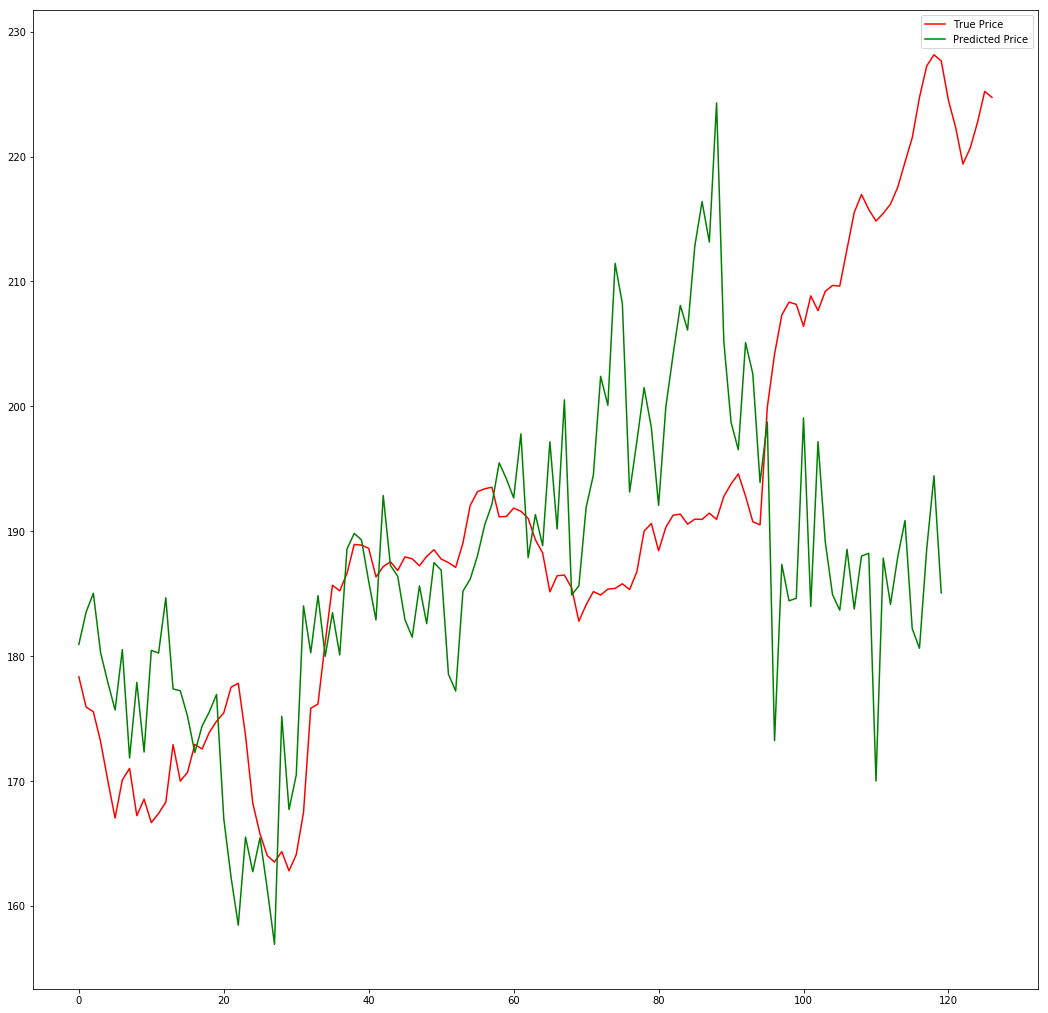

In [8]:
#plot graph of predictions vs true price
plt.figure(figsize = (18,18))
plt.plot(OHLC_mean[4400:], color = 'red', label = 'True Price')
plt.plot(four_month_predictions, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()

In [9]:
#calculate number of times model was right in predicting daily trends
true_values = OHLC_mean[4400:4520]
counter = 0;
for i in range(len(true_values)-1):
    if true_values[i+1] > true_values[i] and four_month_predictions[i+1] > four_month_predictions[i]:
        counter = counter + 1
    elif true_values[i+1] < true_values[i] and four_month_predictions[i+1] < four_month_predictions[i]:
        counter = counter + 1
print (counter)

65


In [26]:
#calculate number of times model was right in predicting trends in 3-day intervals
three_day_interval = []
for i in range (len(true_values)-1):
    if i %  3 == 0:
        three_day_interval.append(true_values[i])
        
three_day_predictions = []
for i in range (len(four_month_predictions)-1):
    if i % 3 == 0:
        three_day_predictions.append(four_month_predictions[i])
        
counter = 0;
for i in range(len(three_day_predictions)-1):
    if three_day_interval[i+1] > three_day_interval[i] and  three_day_predictions[i+1] >  three_day_predictions[i]:
        counter = counter + 1
    elif three_day_interval[i+1]< three_day_interval[i] and  three_day_predictions[i+1] < three_day_predictions[i]:
        counter = counter + 1
print (counter)

21


In [28]:
#Assuming 1 stock is bought/sold each time. Buying is done when the stock is predicted to go up, else it is sold
profit = 0
for i in range (len(true_values)-1):
    if four_month_predictions[i+1] > four_month_predictions[i]:
        profit = profit + true_values[i+1] - true_values[i]
print (profit)

29.830009250000074


In [29]:
#Assuming 1 stock can only be bought/sold once every 3 days
profit = 0
for i in range (len(three_day_predictions)-1):
    if three_day_predictions[i+1] > three_day_predictions[i]:
        profit = profit + three_day_interval[i+1] - three_day_interval[i]
print (profit)

25.569992499999955
